# Modelo de LSTM para TESTES

## Bibliotecas

In [94]:
# Usando a versão 3.10.11 do python

# pip install numpy pandas scikit-learn keras tensorflow pathlib os-sys

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from pathlib import Path
import os
pd.options.mode.chained_assignment = None

## Ler bases

In [95]:
# Manipular caminho para pegar o caminho onde as bases estão
base_diretório = Path(os.getcwd())
diretório_princapl = base_diretório.parent
caminho = diretório_princapl / 'Base' / 'Base Ibovespa Tratada.csv'

# Ler arquivo da base
acao = pd.read_csv(caminho)
acao['Data'] = pd.to_datetime(acao['Data'])

acao

,Data,Último,Abertura,Máxima,Mínima,Variacao (%)
0,2015-01-05,47.517,48.512,48.512,47.264,-0.0205
1,2015-01-06,48.001,47.517,48.061,47.338,0.0102
2,2015-01-07,49.463,48.006,49.882,48.006,0.0305
3,2015-01-08,49.943,49.463,50.261,49.017,0.0097
4,2015-01-09,48.840,49.955,49.955,48.501,-0.0221
...,...,...,...,...,...,...
2577,2025-05-28,138.888,139.541,139.547,138.580,-0.0047
2578,2025-05-29,138.534,138.869,139.108,137.993,-0.0025
2579,2025-05-30,137.027,138.546,138.637,136.726,-0.0109
2580,2025-06-02,136.787,137.026,138.471,136.483,-0.0017


## Aplicando modelo de ML

In [96]:
# Separar um df no qual vai conter apenas os dado para treinamento
# Que é com base no ano escolhido pelo jogador
df_treinamento = acao[acao['Data'].dt.year < 2023]

# Apenas cotação dos dados de treinamento 
cotacao_treinamento = df_treinamento['Último'].to_numpy().reshape(-1, 1)

# Cotação dos dados da base toda
cotacao = acao['Último'].to_numpy().reshape(-1, 1)

# Armazenar tamanho dos dados de treinamento
tamanho_dados_treinamento = int(len(cotacao_treinamento) * 1)

print(f"Tamanho dos dados de treinamento: {tamanho_dados_treinamento}\n")

print(cotacao)

Tamanho dos dados de treinamento: 1979

[[ 47.517]
 [ 48.001]
 [ 49.463]
 ...
 [137.027]
 [136.787]
 [136.685]]


In [97]:
#escalar os dados entre 0 e 1, para deixar mais fácil o processamento
#dados em escala pré definidas são mais fáceis de lidar. 
escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))
                                                
dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

dados_entre_0_e_1

array([[0.10741968],
       [0.11260841],
       [0.12828182],
       ...,
       [1.06701401],
       [1.06444109],
       [1.06334759]])

In [98]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

#dados que serão usados para gerar o resultado
treinamento_x = []
#cotação que aconteceu de fato
treinamento_y = []

for i in range(60, len(dados_para_treinamento)):

    #60 ultimos dias
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
    #cotacao
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:

        print(treinamento_x)
        print(treinamento_y)



[array([0.10741968, 0.11260841, 0.12828182, 0.13342767, 0.12160293,
       0.11409856, 0.11304795, 0.10880262, 0.11287642, 0.12350047,
       0.11000332, 0.11127907, 0.12571962, 0.12806741, 0.1209061 ,
       0.11878343, 0.11893352, 0.10932793, 0.11004621, 0.10089088,
       0.10885623, 0.12293228, 0.1265451 , 0.12582682, 0.12108835,
       0.12742418, 0.11806516, 0.11517062, 0.12903226, 0.140857  ,
       0.14776102, 0.14791111, 0.14731076, 0.14777174, 0.15412901,
       0.15345362, 0.15291759, 0.15100934, 0.1449844 , 0.14801831,
       0.13905595, 0.13795174, 0.13383505, 0.12525863, 0.11573881,
       0.12231049, 0.12203175, 0.11898712, 0.1216887 , 0.13709409,
       0.15039827, 0.14426613, 0.15512602, 0.15449351, 0.15018386,
       0.15395748, 0.14025665, 0.13505719, 0.14736436, 0.14636735])]
[np.float64(0.15893180673034668)]
[array([0.10741968, 0.11260841, 0.12828182, 0.13342767, 0.12160293,
       0.11409856, 0.11304795, 0.10880262, 0.11287642, 0.12350047,
       0.11000332, 0.111

In [99]:
#transformando as listas em arrays e dando reshape 3d 

treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

print(treinamento_x)

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

print(treinamento_x)

[[0.10741968 0.11260841 0.12828182 ... 0.13505719 0.14736436 0.14636735]
 [0.11260841 0.12828182 0.13342767 ... 0.14736436 0.14636735 0.15893181]
 [0.12828182 0.13342767 0.12160293 ... 0.14636735 0.15893181 0.16751895]
 ...
 [0.75222719 0.777667   0.84303005 ... 0.75102649 0.77403274 0.76374103]
 [0.777667   0.84303005 0.84405922 ... 0.77403274 0.76374103 0.76202575]
 [0.84303005 0.84405922 0.85443669 ... 0.76374103 0.76202575 0.7798111 ]]
[[[0.10741968]
  [0.11260841]
  [0.12828182]
  ...
  [0.13505719]
  [0.14736436]
  [0.14636735]]

 [[0.11260841]
  [0.12828182]
  [0.13342767]
  ...
  [0.14736436]
  [0.14636735]
  [0.15893181]]

 [[0.12828182]
  [0.13342767]
  [0.12160293]
  ...
  [0.14636735]
  [0.15893181]
  [0.16751895]]

 ...

 [[0.75222719]
  [0.777667  ]
  [0.84303005]
  ...
  [0.75102649]
  [0.77403274]
  [0.76374103]]

 [[0.777667  ]
  [0.84303005]
  [0.84405922]
  ...
  [0.77403274]
  [0.76374103]
  [0.76202575]]

 [[0.84303005]
  [0.84405922]
  [0.85443669]
  ...
  [0.7637

In [100]:
#construindo o modelo
modelo = Sequential()

# Primeira camada LSTM
modelo.add(LSTM(100, return_sequences=True, input_shape=(treinamento_x.shape[1], 1)))

# Segunda camada LSTM
modelo.add(LSTM(50, return_sequences=False))

# Camada totalmente conectada com os neuronios
modelo.add(Dense(25))

# Camada final de saída
modelo.add(Dense(1))

treinamento_x.shape[1]

c:\Users\YUPOPIC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60

In [101]:
#copilando o modelo
modelo.compile(optimizer="adam", loss="mean_squared_error") 

In [ ]:
#agora com o modelo copilado e os dados, podemos treinar o modelo
#batch size é depois de quantas em quantas amostras o modelo irá otimizar os parâmetros.
#epochs é quantas vezes o algoritmo irá rodar os dados treinamento, aprendendo. 

modelo.fit(treinamento_x, treinamento_y, batch_size=10, epochs=20)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0223
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 8.8394e-04
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 7.4824e-04
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 7.1962e-04
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 8.0766e-04
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 5.5384e-04
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 5.9560e-04
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 5.5457e-04
Epoch 9/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 5.1153e-04
Epoch 10/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 6.9930e-04


In [103]:
# Vriar dados de teste

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :] 

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])
    

In [104]:
# Reshape
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [105]:
len(teste_x)

603

In [106]:
#pegando predições do modelo
predicoes = modelo.predict(teste_x)

#tirando a escala dos dados

predicoes = escalador.inverse_transform(predicoes)

predicoes

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


array([[109.44988 ],
       [108.474335],
       [106.61231 ],
       [105.185974],
       [105.01538 ],
       [105.88273 ],
       [107.06934 ],
       [108.573555],
       [110.292046],
       [111.41167 ],
       [111.64246 ],
       [110.870544],
       [110.49923 ],
       [110.63307 ],
       [111.17678 ],
       [111.49329 ],
       [111.52012 ],
       [111.77656 ],
       [112.42497 ],
       [113.038925],
       [112.9005  ],
       [112.438965],
       [112.2928  ],
       [111.92482 ],
       [110.99871 ],
       [109.609344],
       [108.46568 ],
       [107.50716 ],
       [107.54625 ],
       [107.48665 ],
       [107.44622 ],
       [107.64872 ],
       [107.62548 ],
       [108.025276],
       [108.607216],
       [108.893425],
       [108.36884 ],
       [107.74111 ],
       [106.71097 ],
       [105.76859 ],
       [104.90927 ],
       [104.18443 ],
       [103.43341 ],
       [103.04313 ],
       [103.17494 ],
       [103.39635 ],
       [104.27091 ],
       [104.7

In [107]:
# Criando o grafico do modelo
treinamento = acao.iloc[:tamanho_dados_treinamento, :]
df_previsao = pd.DataFrame({"Data": acao['Data'].iloc[tamanho_dados_treinamento:],
                        "Último": acao['Último'].iloc[tamanho_dados_treinamento:],
                        "predicoes": predicoes.reshape(len(predicoes))})


In [108]:
treinamento

,Data,Último,Abertura,Máxima,Mínima,Variacao (%)
0,2015-01-05,47.517,48.512,48.512,47.264,-0.0205
1,2015-01-06,48.001,47.517,48.061,47.338,0.0102
2,2015-01-07,49.463,48.006,49.882,48.006,0.0305
3,2015-01-08,49.943,49.463,50.261,49.017,0.0097
4,2015-01-09,48.840,49.955,49.955,48.501,-0.0221
...,...,...,...,...,...,...
1974,2022-12-23,109.698,107.552,109.994,107.552,0.0200
1975,2022-12-26,108.738,109.699,109.755,108.309,-0.0087
1976,2022-12-27,108.578,108.739,109.353,107.418,-0.0015
1977,2022-12-28,110.237,108.578,110.536,108.578,0.0153


In [109]:
df_previsao

,Data,Último,predicoes
1979,2023-01-02,106.376,109.449883
1980,2023-01-03,104.166,108.474335
1981,2023-01-04,105.334,106.612312
1982,2023-01-05,107.641,105.185974
1983,2023-01-06,108.964,105.015381
...,...,...,...
2577,2025-05-28,138.888,136.133484
2578,2025-05-29,138.534,136.601212
2579,2025-05-30,137.027,136.784088
2580,2025-06-02,136.787,136.278427


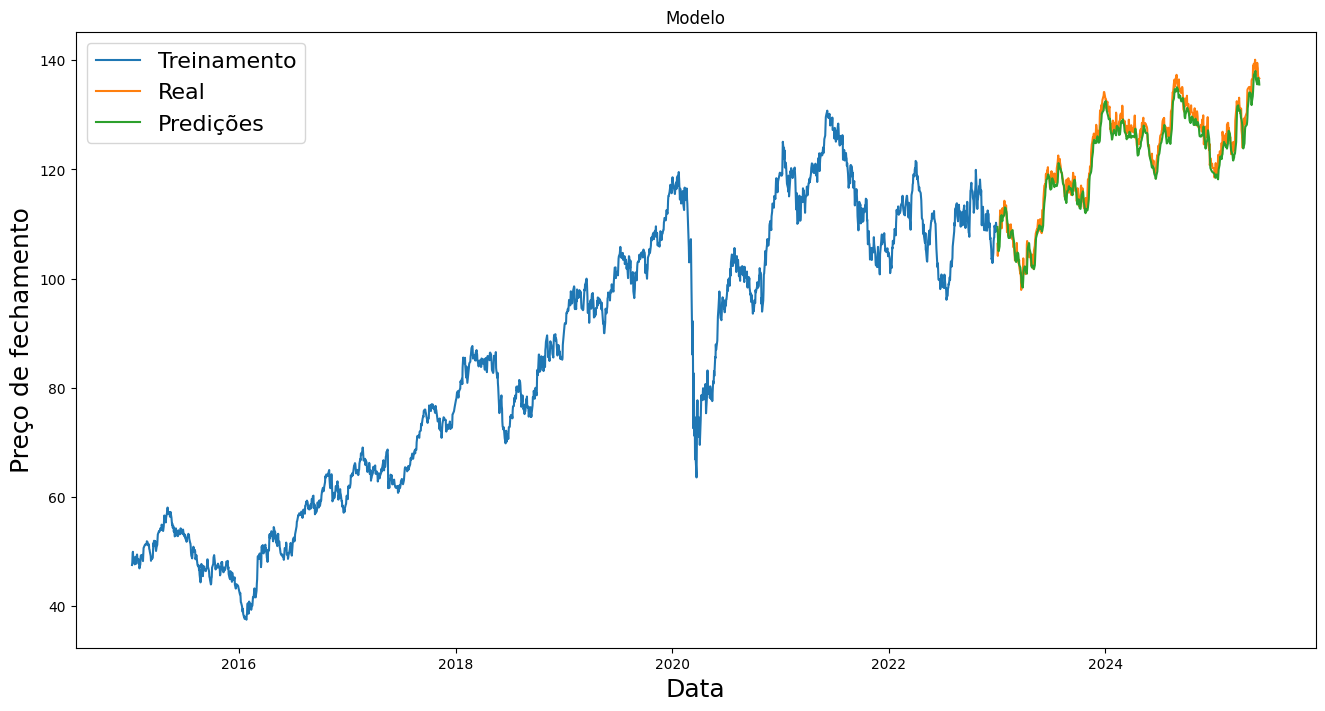

In [110]:
# Setar a data como index dos df (df_previsao e treinamento)
df_previsao.set_index('Data', inplace=True)
treinamento.set_index('Data', inplace=True)

plt.figure(figsize =(16, 8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento", fontsize = 18)
plt.plot(treinamento[['Último']])
plt.plot(df_previsao[['Último', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [111]:
df_previsao.sort_index()

df_previsao

,Último,predicoes
Data,,
2023-01-02,106.376,109.449883
2023-01-03,104.166,108.474335
2023-01-04,105.334,106.612312
2023-01-05,107.641,105.185974
2023-01-06,108.964,105.015381
...,...,...
2025-05-28,138.888,136.133484
2025-05-29,138.534,136.601212
2025-05-30,137.027,136.784088


In [112]:
df_previsao_semanal = df_previsao
df_previsao_semanal['Semana'] = ((df_previsao_semanal.index - df_previsao_semanal.index.min()).days // 7) + 1
df_previsao_semanal.head(30)

,Último,predicoes,Semana
Data,,,
2023-01-02,106.376,109.449883,1
2023-01-03,104.166,108.474335,1
2023-01-04,105.334,106.612312,1
2023-01-05,107.641,105.185974,1
2023-01-06,108.964,105.015381,1
2023-01-09,109.130,105.882729,2
2023-01-10,110.817,107.069344,2
2023-01-11,112.517,108.573555,2
2023-01-12,111.850,110.292046,2


In [113]:
df_previsao_semanal = df_previsao_semanal.reset_index() 
df_previsao_semanal

,Data,Último,predicoes,Semana
0,2023-01-02,106.376,109.449883,1
1,2023-01-03,104.166,108.474335,1
2,2023-01-04,105.334,106.612312,1
3,2023-01-05,107.641,105.185974,1
4,2023-01-06,108.964,105.015381,1
...,...,...,...,...
598,2025-05-28,138.888,136.133484,126
599,2025-05-29,138.534,136.601212,126
600,2025-05-30,137.027,136.784088,126
601,2025-06-02,136.787,136.278427,127


# Metricas para calcular nosso modelo de ML

### Mean Absolute Error (MAE) e Mean Absolute Percentage Error (MAPE)

In [114]:
# A média das diferenças absolutas entre as previsões e os valores reais. Penaliza todos os erros da mesma forma

mae = mean_absolute_error(df_previsao['Último'], df_previsao['predicoes'])

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.56


In [115]:
# Calcular o MAPE
mape = mean_absolute_percentage_error(df_previsao['Último'], df_previsao['predicoes'])

print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f} = {100*mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 0.0127 = 1.27%


### Root Mean Squared Error (RMSE)

In [116]:
# A raiz quadrada da média dos erros ao quadrado. Dá mais peso a grandes erros

rmse = np.sqrt(mean_squared_error(df_previsao['Último'], df_previsao['predicoes']))
mean_price = df_previsao['Último'].mean()

print(f"RMSE: {rmse}")
print(f"RMSE percentual: {(rmse / mean_price)} = {(rmse / mean_price)*100:.3}%")

RMSE: 1.9308033159023839
RMSE percentual: 0.015749188509231623 = 1.57%


### Directional Accuracy (Diário)

In [117]:
df_previsao = df_previsao.reset_index() 

# Adicionar colunas de mês e ano com base na coluna 'Data'
df_previsao['Mes'] = df_previsao['Data'].dt.month
df_previsao['Ano'] = df_previsao['Data'].dt.year

# Calcular a variação percentual semanal para Price e Predicoes
df_previsao['Variação Real (%)'] = df_previsao['Último'].pct_change() * 100
df_previsao['Variação Prevista (%)'] = df_previsao['predicoes'].pct_change() * 100


# Remover NaN (primeira linha não terá variação por não ter valor anterior)
df_teste_dia = df_previsao.dropna()

# Calcular se a direção do valor previsto foi igual ao real (1 = acertou | 0 = errou)
df_teste_dia['direcao_correta'] = np.where(
    (df_teste_dia['Variação Real (%)'] > 0) & (df_teste_dia['Variação Prevista (%)'] > 0) |
    (df_teste_dia['Variação Real (%)'] < 0) & (df_teste_dia['Variação Prevista (%)'] < 0),
    1, 0
)

# Calcular a métrica de Erro de Direção (Directional Accuracy)
directional_accuracy = df_teste_dia['direcao_correta'].mean()

# Exibir resultados
print(f"Directional Accuracy (Diário): {directional_accuracy * 100:.2f}%")

df_teste_dia

Directional Accuracy (Diário): 49.50%


,Data,Último,predicoes,Semana,Mes,Ano,Variação Real (%),Variação Prevista (%),direcao_correta
1,2023-01-03,104.166,108.474335,1,1,2023,-2.077536,-0.891322,1
2,2023-01-04,105.334,106.612312,1,1,2023,1.121287,-1.716554,0
3,2023-01-05,107.641,105.185974,1,1,2023,2.190176,-1.337874,0
4,2023-01-06,108.964,105.015381,1,1,2023,1.229086,-0.162184,0
5,2023-01-09,109.130,105.882729,2,1,2023,0.152344,0.825930,1
...,...,...,...,...,...,...,...,...,...
598,2025-05-28,138.888,136.133484,126,5,2025,-0.467963,0.394499,0
599,2025-05-29,138.534,136.601212,126,5,2025,-0.254882,0.343585,0
600,2025-05-30,137.027,136.784088,126,5,2025,-1.087820,0.133872,0
601,2025-06-02,136.787,136.278427,127,6,2025,-0.175148,-0.369680,1


### Directional Accuracy (Semanal)

In [118]:
df_previsao_semanal.reset_index() 
# Agrupar por semana e calcular o preço médio semanal para real e previsões
df_teste_semana = df_previsao_semanal.groupby('Semana').agg({
    'predicoes': 'first',   # pegar a previsão do primeiro dia da semana
    'Último': 'first',       # pegar o valor real do primeiro dia da semana
    'Data': 'first'         # Pega a primeira data da semana 
})

# Adicionar colunas de mês e ano com base na coluna 'Data'
df_teste_semana['Mes'] = df_teste_semana['Data'].dt.month
df_teste_semana['Ano'] = df_teste_semana['Data'].dt.year

# Calcular a variação percentual semanal para Price e Predicoes
df_teste_semana['Variação Real (%)'] = df_teste_semana['Último'].pct_change() * 100
df_teste_semana['Variação Prevista (%)'] = df_teste_semana['predicoes'].pct_change() * 100


# Remover NaN (primeira linha não terá variação por não ter valor anterior)
df_teste_semana = df_teste_semana.dropna()

# Calcular se a direção do valor previsto foi igual ao real (1 = acertou | 0 = errou)
df_teste_semana['direcao_correta'] = np.where(
    (df_teste_semana['Variação Real (%)'] > 0) & (df_teste_semana['Variação Prevista (%)'] > 0) |
    (df_teste_semana['Variação Real (%)'] < 0) & (df_teste_semana['Variação Prevista (%)'] < 0),
    1, 0
)

# Calcular a métrica de Erro de Direção (Directional Accuracy)
directional_accuracy = df_teste_semana['direcao_correta'].mean()

# Exibir resultados
print(f"Directional Accuracy (Semanal): {directional_accuracy * 100:.2f}%")

df_teste_semana

Directional Accuracy (Semanal): 69.05%


,predicoes,Último,Data,Mes,Ano,Variação Real (%),Variação Prevista (%),direcao_correta
Semana,,,,,,,,
2,105.882729,109.130,2023-01-09,1,2023,2.588930,-3.259164,0
3,111.642464,109.213,2023-01-16,1,2023,0.076056,5.439734,1
4,111.493294,111.737,2023-01-23,1,2023,2.311080,-0.133616,0
5,112.900497,112.273,2023-01-30,1,2023,0.479698,1.262140,1
6,109.609344,108.722,2023-02-06,2,2023,-3.162826,-2.915090,1
...,...,...,...,...,...,...,...,...
123,133.951462,133.491,2025-05-05,5,2025,-1.129496,0.975251,0
124,133.421646,136.563,2025-05-12,5,2025,2.301279,-0.395530,0
125,137.677902,139.636,2025-05-19,5,2025,2.250243,3.190076,1


In [119]:
# df_teste_semana.to_csv("previsão semanal - Bitcoin.csv")